## Exploración Inicial del Dataset de Precios de Vivienda de California

### Objetivo: Cargar y obtener una comprensión básica de los datos.

In [9]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Importamos Matplotlib para visualización
import seaborn as sns # Seaborn se basa en Matplotlib y ofrece gráficos más atractivos

### 1. Vistazo Inicial a los Datos

Ahora que tenemos los datos en un DataFrame de Pandas, podemos realizar algunas inspecciones rápidas.

In [10]:
print("Primeras 5 filas del DataFrame:")
display(df.head()) # 'display()' en notebooks muestra el DataFrame de forma formateada

Primeras 5 filas del DataFrame:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


`df.head()` nos muestra las primeras 5 filas, dándonos una idea de la estructura y los valores.

In [13]:
print("\nInformación general del DataFrame:")
df.info() # Muestra el número de entradas, el tipo de cada columna y si hay valores nulos.


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


`df.info()` es súper útil para saber si hay datos faltantes (NaNs) y los tipos de datos (int, float, object).

In [16]:
print("\nEstadísticas descriptivas básicas:")
display(df.describe()) # Calcula estadísticas como media, desviación estándar, min, max, cuartiles.


Estadísticas descriptivas básicas:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


`df.describe()` nos da una visión rápida de la distribución de los valores numéricos.

In [17]:
# Verifiquemos si hay valores nulos explícitamente
print("\nVerificación de valores nulos por columna:")
print(df.isnull().sum())


Verificación de valores nulos por columna:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


`df.isnull().sum()` nos suma cuántos valores nulos hay en cada columna.


Si todos los resultados son 0, significa que no hay datos faltantes.

### 3. Visualización de la Distribución de Precios (Target)

Un histograma nos mostrará cuántas viviendas caen dentro de ciertos rangos de precios.

Es muy importante para entender la distribución de nuestra variable objetivo.

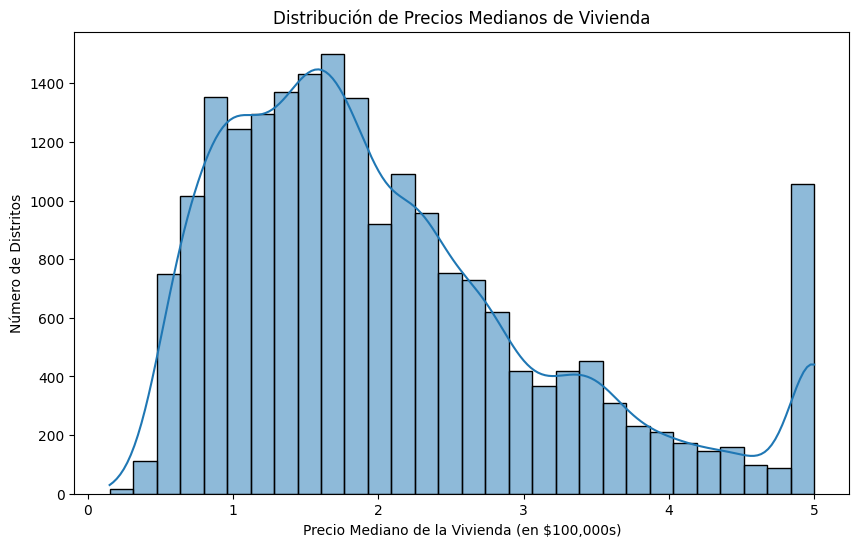

In [18]:
plt.figure(figsize=(10, 6)) # Define el tamaño de la figura del gráfico
sns.histplot(df['MedHouseVal'], kde=True, bins=30) # kde=True añade una curva de densidad que suaviza el histograma
plt.title('Distribución de Precios Medianos de Vivienda') # Título del gráfico
plt.xlabel('Precio Mediano de la Vivienda (en $100,000s)') # Etiqueta del eje X
plt.ylabel('Número de Distritos') # Etiqueta del eje Y
plt.show() # Muestra el gráfico

### 4. Matriz de Correlación: Relación entre Variables

Una matriz de correlación nos muestra qué tan linealmente relacionadas están dos variables.

Un valor cercano a 1 indica una correlación positiva fuerte, cercano a -1 una correlación negativa fuerte,

y cercano a 0, poca o ninguna correlación lineal.

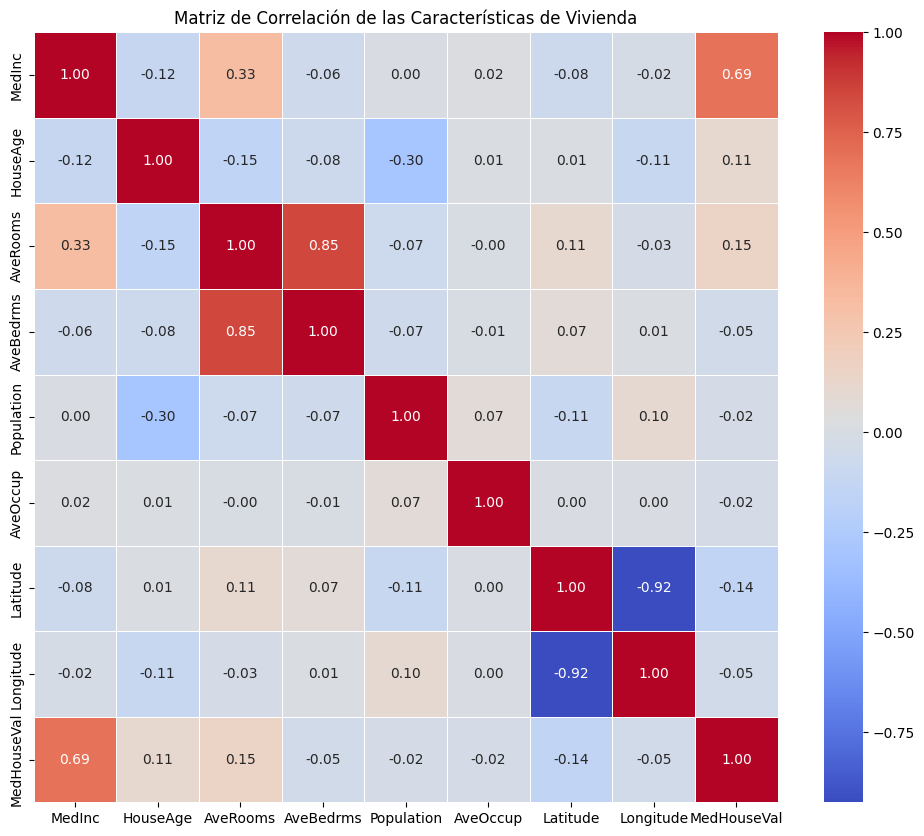

In [19]:
plt.figure(figsize=(12, 10)) # Define el tamaño de la figura
# Calculamos la matriz de correlación de todas las columnas numéricas
correlation_matrix = df.corr(numeric_only=True) # numeric_only=True para evitar advertencias si hubiera columnas no numéricas

# Creamos el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# annot=True: Muestra los valores de correlación en cada celda.
# cmap='coolwarm': Paleta de colores (azul para negativo, rojo para positivo).
# fmt=".2f": Formato para mostrar los números con dos decimales.
# linewidths=.5: Líneas finas entre las celdas para mayor claridad.

plt.title('Matriz de Correlación de las Características de Vivienda') # Título del gráfico
plt.show() # Muestra el gráfico

### 5. Gráfico de Dispersión: Ingreso Mediano vs. Precio Mediano

Un scatter plot nos permite ver la relación directa entre dos variables numéricas.

Aquí, veremos cómo el ingreso del hogar se relaciona con el precio de la vivienda.

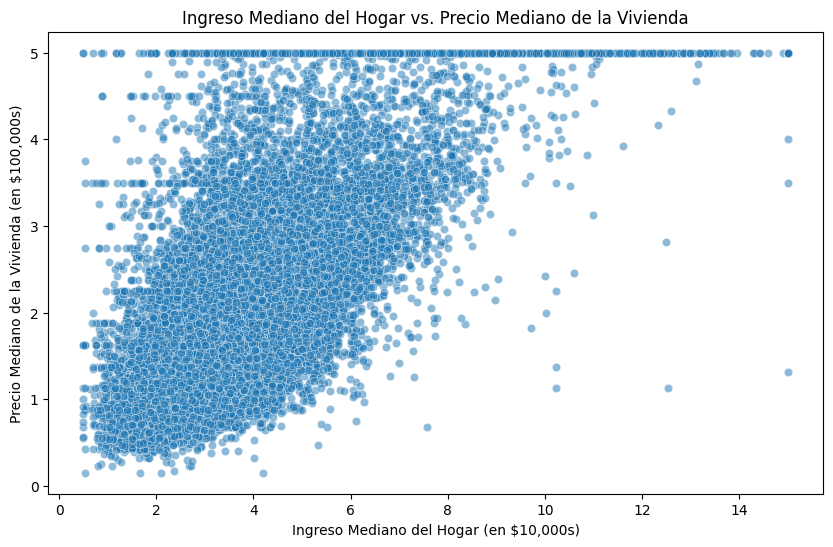

In [20]:
plt.figure(figsize=(10, 6))
# sns.scatterplot() es ideal para ver la relación entre dos variables.
# El argumento 'alpha' hace las marcas semitransparentes, útil si hay muchos puntos superpuestos.
sns.scatterplot(data=df, x='MedInc', y='MedHouseVal', alpha=0.5)
plt.title('Ingreso Mediano del Hogar vs. Precio Mediano de la Vivienda')
plt.xlabel('Ingreso Mediano del Hogar (en $10,000s)')
plt.ylabel('Precio Mediano de la Vivienda (en $100,000s)')
plt.show()